In [ ]:
import torch

# 첫 번째 코드 (행렬 곱셈 예제)
c = torch.tensor([1, 0, 0, 0, 0, 0, 0], dtype=torch.float32)  # NumPy 배열 -> PyTorch 텐서
W = torch.randn(7, 3)  # PyTorch에서 랜덤 초기화
h = torch.matmul(c, W)  # 행렬 곱셈
print(h)

# 두 번째 코드 (MatMul 레이어 예제)
class MatMul:
    def __init__(self, W):
        self.W = W

    def forward(self, x):
        return torch.matmul(x, self.W)

c = torch.tensor([1, 0, 0, 0, 0, 0, 0], dtype=torch.float32)  # NumPy 배열 -> PyTorch 텐서
W = torch.randn(7, 3)  # PyTorch에서 랜덤 초기화
layer = MatMul(W)
h = layer.forward(c)
print(h)

# 세 번째 코드 (복합적인 예제)
c0 = torch.tensor([[1, 0, 0, 0, 0, 0, 0]], dtype=torch.float32)
c1 = torch.tensor([[0, 0, 1, 0, 0, 0, 0]], dtype=torch.float32)

# 가중치 초기화
W_in = torch.randn(7, 3)  # PyTorch에서 랜덤 초기화
W_out = torch.randn(3, 7)  # PyTorch에서 랜덤 초기화

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)  # 평균
s = out_layer.forward(h)  # 출력값

print(s)


tensor([0.2734, 0.8200, 0.5601])
tensor([-1.5151,  0.5462,  0.7713])
tensor([[-1.7306,  0.0899, -0.4622,  2.2922,  0.2901, -2.9781,  1.3961]])


In [2]:
import sys
import torch
from common.util import preprocess

# 텍스트 예시
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

# corpus 출력
print(corpus)

# id_to_word 출력
print(id_to_word)

# context와 target을 생성하는 함수 (PyTorch 버전)
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]  # target은 중간 부분
    contexts = []
    
    # context 생성
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t != 0:
                cs.append(corpus[idx + t])  # 주변 단어를 context에 추가
        contexts.append(cs)
        
    return torch.tensor(contexts), torch.tensor(target)

# context와 target 생성
contexts, target = create_contexts_target(corpus, window_size=1)

# 결과 출력
print('contexts:', contexts)
print('target:', target)


[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
contexts: tensor([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]])
target: tensor([1, 2, 3, 4, 1, 5])


Epoch 1/1000, Loss: 2.075781285762787
Epoch 2/1000, Loss: 2.0714327096939087
Epoch 3/1000, Loss: 2.0675368905067444
Epoch 4/1000, Loss: 2.0637027621269226
Epoch 5/1000, Loss: 2.059895098209381
Epoch 6/1000, Loss: 2.056104004383087
Epoch 7/1000, Loss: 2.052326023578644
Epoch 8/1000, Loss: 2.0485594868659973
Epoch 9/1000, Loss: 2.0448030829429626
Epoch 10/1000, Loss: 2.0410558581352234
Epoch 11/1000, Loss: 2.037317395210266
Epoch 12/1000, Loss: 2.0335870385169983
Epoch 13/1000, Loss: 2.0298640727996826
Epoch 14/1000, Loss: 2.026147961616516
Epoch 15/1000, Loss: 2.0224377512931824
Epoch 16/1000, Loss: 2.018732964992523
Epoch 17/1000, Loss: 2.0150328278541565
Epoch 18/1000, Loss: 2.0113364458084106
Epoch 19/1000, Loss: 2.007643163204193
Epoch 20/1000, Loss: 2.003951668739319
Epoch 21/1000, Loss: 2.0002617239952087
Epoch 22/1000, Loss: 1.9965718388557434
Epoch 23/1000, Loss: 1.992881417274475
Epoch 24/1000, Loss: 1.989189088344574
Epoch 25/1000, Loss: 1.985494613647461
Epoch 26/1000, Loss: 

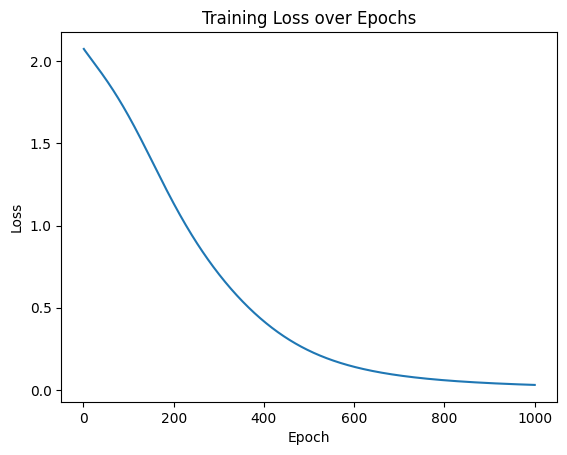

In [10]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_contexts_target, convert_one_hot
from torch import nn
import torch.optim as optim

# 텍스트 전처리
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

# vocab_size 계산
vocab_size = len(word_to_id)

# context와 target 생성
contexts, target = create_contexts_target(corpus, window_size=1)

# One-hot 벡터로 변환 (target을 정수형 클래스 인덱스로 변환)
target = torch.tensor(target, dtype=torch.long)  # target은 클래스 레이블로 변환
contexts = convert_one_hot(contexts, vocab_size)
contexts = torch.tensor(contexts, dtype=torch.float32)  # One-hot 벡터를 PyTorch 텐서로 변환

# SimpleCBOW 모델 정의 (PyTorch 버전)
class SimpleCBOW(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(SimpleCBOW, self).__init__()
        
        # 가중치 초기화
        self.in_layer0 = nn.Linear(vocab_size, hidden_size)
        self.in_layer1 = nn.Linear(vocab_size, hidden_size)
        self.out_layer = nn.Linear(hidden_size, vocab_size)
        
        # 손실 함수 (CrossEntropyLoss 사용)
        self.loss_layer = nn.CrossEntropyLoss()

    def forward(self, contexts, target):
        h0 = self.in_layer0(contexts[:, 0])  # 첫 번째 context 단어
        h1 = self.in_layer1(contexts[:, 1])  # 두 번째 context 단어
        h = (h0 + h1) * 0.5  # 평균
        score = self.out_layer(h)  # 출력값 (로짓)
        
        loss = self.loss_layer(score, target)  # 손실 계산
        return loss

# 모델 초기화
hidden_size = 5
model = SimpleCBOW(vocab_size, hidden_size)

# Adam 옵티마이저 설정
optimizer = optim.Adam(model.parameters())

# Trainer 클래스 구현 (PyTorch 버전)
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.losses = []  # 손실값을 저장할 리스트 추가

    def fit(self, contexts, target, max_epoch, batch_size):
        data_size = len(contexts)
        for epoch in range(max_epoch):
            total_loss = 0
            for i in range(0, data_size, batch_size):
                batch_contexts = contexts[i:i+batch_size]
                batch_target = target[i:i+batch_size]
                
                # 모델 훈련 모드로 설정
                self.model.train()

                # 순전파
                loss = self.model(batch_contexts, batch_target)
                
                # 기울기 초기화
                self.optimizer.zero_grad()
                
                # 역전파
                loss.backward()
                
                # 파라미터 업데이트
                self.optimizer.step()
                
                total_loss += loss.item()
            
            # 에폭마다 평균 손실값을 기록
            self.losses.append(total_loss / (data_size // batch_size))
            print(f"Epoch {epoch + 1}/{max_epoch}, Loss: {total_loss / (data_size // batch_size)}")

    def plot(self):
        # 손실 값 그래프 그리기
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss over Epochs")
        plt.show()  # 그래프를 명시적으로 출력합니다.

# Trainer 객체 생성
trainer = Trainer(model, optimizer)

# 훈련 시작
trainer.fit(contexts, target, max_epoch=1000, batch_size=3)

# 훈련 후 손실값 그래프 출력
trainer.plot()


In [15]:
# word_vecs1을 모델에서 가져옵니다.
word_vecs1 = model.in_layer0.weight.detach().numpy()  # .weight로 가져옴
for word_id, word in id_to_word.items():
    if word_id < word_vecs1.shape[0]:  # 인덱스가 범위 내에 있는지 확인
        print(word, word_vecs1[word_id])


print()
# word_vecs2를 모델에서 가져옵니다.
word_vecs2 = model.out_layer.weight.detach().numpy()  # .weight로 가져옴
for word_id, word in id_to_word.items():
    if word_id < word_vecs2.shape[0]:  # 인덱스가 범위 내에 있는지 확인
        print(word, word_vecs2[word_id])


you [-0.9723825   0.6901315   1.0536722   1.0251725  -0.7969618   0.29054543
 -0.24292676]
say [ 1.1287999   0.2996275  -0.52886313 -1.0890512   0.7542116   0.10388282
  0.15400127]
goodbye [-1.0901911  -1.3609284   0.5804515   0.9969037  -0.7558113   0.13882658
 -0.02798477]
and [ 1.0797817  -1.2845846   0.9563245  -0.6208565   1.2457869  -0.04524431
  0.12252304]
i [-0.54055107 -0.7259457  -1.2710136   1.3313888  -0.57554984  0.08542269
 -0.26460984]

you [-0.71181864  0.13082667  0.76240677 -0.23108059  0.55306387]
say [-1.6885321   1.5688559  -0.905381    1.2506884  -0.11171599]
goodbye [-0.6897999  -1.1380924  -1.0507542  -0.82702774 -1.3361917 ]
and [ 0.8483219 -1.1382523  0.9292786  1.315392  -1.071763 ]
i [ 1.0415789  -1.1924696   1.3238263  -0.50758594  1.7613019 ]
hello [ 1.3641393  1.3689564 -0.6889258 -1.2908356  0.770838 ]
. [-0.38202664  0.41879818  0.7733835  -0.07870785  0.7625253 ]
